# <center> **Chaos Theory: A Primer** </center>

<i><center>Does the flap of a butterfly’s wings in Brazil set off a tornado in Texas?</i></center>
<div align="right"><i>-- Philip Merilees</i></div>

## 1. What is Chaos Theory?

We have all probably heard of the butterfly effect at some point in our lives. A small flutter in the wings of a butterfly may result in ripples of change in a distant land. Did you know, however, that this metaphorical understanding of the butterfly effect actually has its roots in a scientific theory? Welcome to the world of Chaos Theory!

Chaos theory is an interdisciplinary scientific theory that focuses on dynamic systems which are highly sensitive to initial conditions. A small change in the initial conditions of a system will result in large differences in the outcome. Chaos theory can be applied in numerous different fields. In this Jupyter Notebook, you will learn about chaos theory through mathematical modelling and simulations. You will also see some applications of chaos theory in the field of Biology (population growth), Physics (double pendulum) and even Metereology (Lorentz Attractor)! 

Let's explore chaos theory with an example from a biological system!

First, let's import all the relevant packages: 

In [2]:
##Importing relevant libraries##
import numpy as np 
import matplotlib.pyplot as plt

## 2. Chaos Theory in Biological system

Suppose that we want to model the population of chickens over the years. The simplest model you can imagine would be this: 



$$X_{n+1}=rX_n$$

where 
- $X_n$ = Population in year $n$  
- $n$ = number of years
- $r$ = growth rate of the chickens

A point to note here would be that $X$ refers to the proportion of the theoretical maximum population of chickens. This means that $0$ < $X$ < $1$ , with $X$ = $1$ when the population of chickens is at it's maximum. Moving on, the equation above would pose a problem since the population of chickens can never be growing forever. Realistically, we need to consider the environmental constraints such as the amount of food available. This can be represented by adding the equation $1-X$ into the above equation. As you can imagine, as $X$ &rarr; $1$ (the theoretical maximum population of chicken), $1-X$ would &rarr; $0$ and this would constraint the population of chickens in the following year. Therefore, a simple equation modelling the population of chickens over time would be:

$$X_{n+1}=rX_n(1-X_n)$$

where 
- $X_n$ = Population in year $n$  
- $n$ = number of years
- $r$ = growth rate of the chickens  
- $1-X_n$ = environmental constraints to the chickens at the current year
  

Now, let's try to model this equation with a graph. For simplicity's sake, let's assume that the growth rate, $r$ = 1 for now.

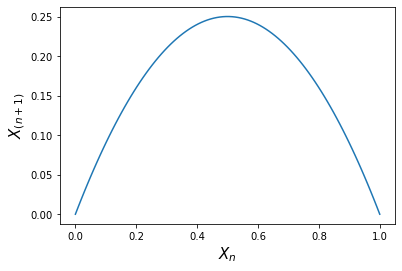

In [3]:
#Modelling this equation
x = np.linspace(0, 1, num=100, endpoint=True)
y = 1*x*(1-x)

plt.plot(x,y)
plt.xlabel('$X_n$', size=15)
plt.ylabel('$X_{(n+1)}$', size=15)
plt.show()

As you can infer from the graph above, $X_{n+1}$ is at its maximum when $X_n$ is 0.5. By substituting $X_n$ = 0.5 into the above equation, we get:

$$X_{n+1}=0.5r(1-0.5),$$

Since the maximum value for $X_{n+1}$ is 1,

$$1 = 0.25r$$

We can deduce that the maximum value that the growth rate $r$ can take is 4. If $r$ exceeds $4$, $X_{n+1}$ will exceed $1$, which does not make sense since the theoretical maximum population of chickens is $X$ = $1$. 

### (a) Equilibrium population 

In the real world, the population of organisms will hit an equilibrium depending on the value of the growth rate, $r$. Let's look at an example of the change in population of chickens as the years go by:

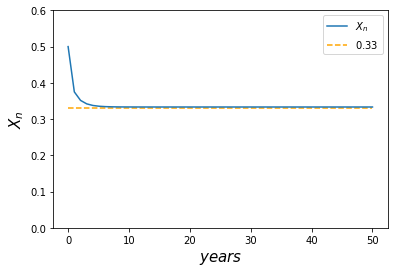

In [4]:
##Plotting a graph

t = np.linspace(0,50, num=50, endpoint=True)
x = 0.5 #assuming initial population is half of the maximum population

def func(rate, x=0.5):    
    pop = [x]
    for i in range(49):
        x = rate*x*(1-x)
        pop.append(x)
    return pop

plt.hlines(y=0.33, xmin=min(t), xmax=max(t),
           color='orange', linestyle='dashed',label='$ 0.33$')
plt.plot(t,func(1.5),label='$X_n$')
plt.legend(loc='upper right')
plt.xlabel('$years$', size=15)
plt.ylabel('$X_n$', size=15)
plt.ylim(0,0.6)
plt.show()

Assuming that the initial population is half of the maximum population, $X_n$ = 0.5. When the growth rate is $r$ = 1.5, the equilibrium population will stabilise at around $X_n$ = 0.33.  


### (b) Does the initial population affect the equilibrium population?

Now let us take a look at what happens when the value of the the initial population, $X_n$ changes:

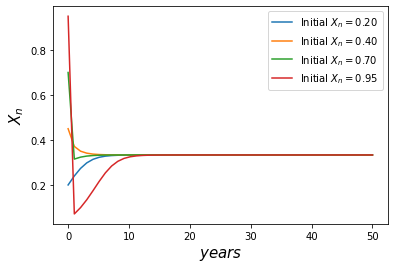

In [5]:
##Plotting all the graphs into 1 figure for comparison##

  
##When initial population is 0.20##
plt.plot(t,func(1.5,x=0.20),label='Initial $X_n = 0.20$')

##When initial population is 0.45##
plt.plot(t,func(1.5,x=0.45),label='Initial $X_n = 0.40$')

##When initial population is 0.70##
plt.plot(t,func(1.5,x=0.70),label='Initial $X_n = 0.70$')

##When initial population is 0.95##
plt.plot(t,func(1.5,x=0.95),label='Initial $X_n = 0.95$')

plt.xlabel('$years$', size=15)
plt.ylabel('$X_n$', size=15)
plt.legend(loc='upper right')
plt.show()

As seen from the graphs above, as long as 0 < $X_n$ < 1, the equilibrium population will always stabilise at around $X_n$ = 0.33.  

This means that the initial population of chickens will not have an effect on its equilibrium population after many years. 

### (c) Does the growth rate affect the equilibrium population?

Now let us take a look at what happens when the value of the growth rate changes:

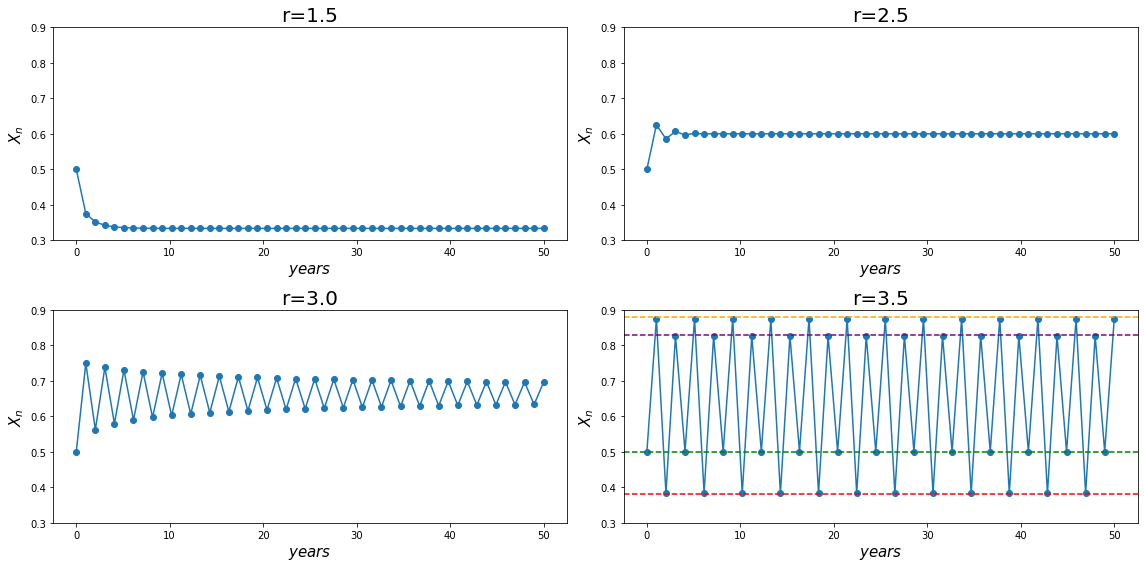

In [6]:
t = np.linspace(0,50, num=50, endpoint=True)
x = 0.5 #assuming initial population is half of the maximum population

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

list_axes = [[0,0],[0,1],[1,0],[1,1]]
list_r = [1.5,2.5,3.0,3.5] #list of r values for plotting

for i in range(4):
    x,y=list_axes[i]
    axes[x,y].plot(t,func(list_r[i]),"o-")
    axes[x,y].set_xlabel('$years$', size=15)
    axes[x,y].set_ylabel('$X_n$', size=15)
    axes[x,y].set_title(f"r={list_r[i]}" ,size=20)
    axes[x,y].set_ylim(0.3,0.9)

##horizontal lines to show the intersection between the graph and the different population values##
axes[1, 1].axhline(y=0.38,c="red",linestyle='dashed')
axes[1, 1].axhline(y=0.5,c="green",linestyle='dashed')
axes[1, 1].axhline(y=0.83,c="purple",linestyle='dashed')
axes[1, 1].axhline(y=0.88,c="orange",linestyle='dashed')

plt.tight_layout()
plt.show()

Will the stable populations ever converge?
The answer is no, they tend toward the asymptote of X_n = 0.66...


[0.6659205079991048, 0.6674111550759569, 0.6659205154684017, 0.6674111476400997, 0.6659205229374743, 0.6674111402044652, 0.6659205304063226, 0.6674111327690537, 0.6659205378749468, 0.6674111253338652]


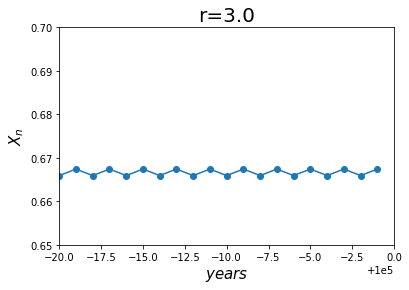

In [7]:
fig, ax = plt.subplots()
def funa(rate, x=0.5):    
    pop = [x]
    for i in range(99999):
        x = rate*x*(1-x)
        pop.append(x)
    return pop

ax.plot(np.arange(0,100000,1),funa(3),"o-")
ax.set_xlabel('$years$', size=15)
ax.set_ylabel('$X_n$', size=15)
ax.set_title(f"r=3.0" ,size=20)
ax.set_ylim(0.65,0.7)
ax.set_xlim(99980,100000)

print(funa(3)[99990:100000])

Looking at the above graphs, we can infer that the equilibrium population is dependent only on the value of the growth rate, $r$ . When $r$ = 2.5, the equilibrium population stabilises at one value, whereby $X_n$ is approximately  0.6. For now, it still makes sense because as the growth rate increases, we would expect the equilibrium population to stabilise at a higher proportion, $X_n$.

However, when $r$ = 3.0, we begin to see that $X_n$ will never be maintained at any proportion but rather it would oscillate between 0.63 and 0.7 approximately. This means that in one year, $X_n$ will be 0.63 and in the following year, $X_n$ will be 0.70 and in the next year, $X_n$ will return back to 0.63 and the cycle continues with $X_n$ oscillating between these 2 values. 

However, when $r$ = 3.5, something interesting happens! Instead of oscillating between 2 values, $X_n$ starts to oscillate between 4 values and it will go through a 4 years cycle before repeating again.This is shown in the graph above whereby $X_n$ will always intersect with one of the 4 horizontal lines in this order:  

$$Green > Yellow > Red > Purple $$

 
As the growth rate $r$ continues to increase towards the maximum value of 4, we will see that $X_n$ will oscillate between more values instead. This phenomenon is known as Period-doubling bifurcation, whereby a slight change in the parameter of an equation (in this case, $r$ ) would result in a new periodic trajectory to emerge - with doubling the period of the original trajectory.

### (d) Plotting the Bifurcation plot

To explain this further, let us plot the graph of the equilibrium population $X_n$ against the growth rate, $r$, for $0$ < $r$ < $1$. The equilibrium population $X_n$ value after 100 years will be plotted against the growth rate, $r$. You will observe that when the value of $r$ increases towards $4$, the number of years of cycle for $X_n$ will continue to double, resulting in chaos :


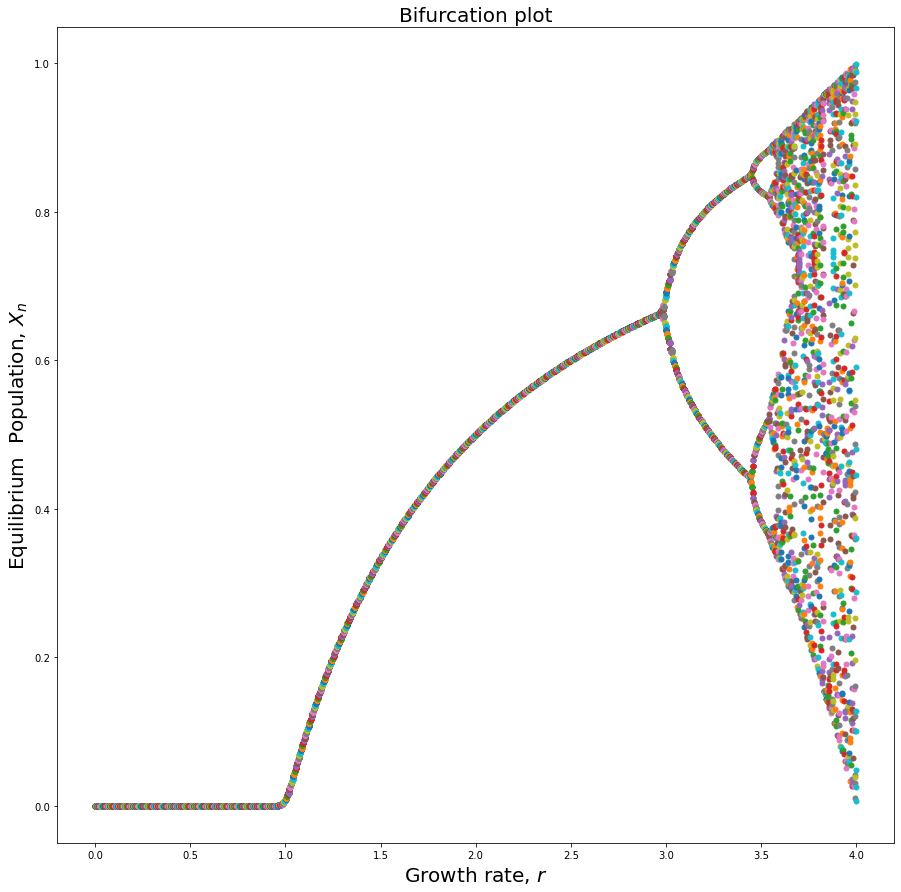

In [8]:
#Bifurcation plot/logistic map

R=np.linspace(0,4,1000) #Values of Rate

plt.figure(figsize=(15, 15))
 
for r in R:
    A=[]  #empty list to store the equilibrium population   
    x=np.random.random() #since the equilibrium population is not affected by the 
                         #initial population, we can just generate any random number for initial X    
    for n in range(100): #Go through 100 "years" to get the final equilibrium population for X
        x=r*x*(1-x)
    
    for n in range(15): #Assume the population reached equilibrium already
        x=r*x*(1-x)      #We will take the next 15 points and append them to list B
        A.append(x)      #So for 1 value of r, we have 15 points of equilibrium points
        
    plt.plot([r]*len(A), A, ls = '', marker = '.', markersize = 10)

plt.title('Bifurcation plot', size=20)
plt.xlabel('Growth rate, $r$', size=20)
plt.ylabel('Equilibrium  Population, $X_n$', size=20)
plt.show()     

The graph you observe above is known as a bifurcation plot or a logistic map. As you can see from the graph above, when $r$ increases towards 4, $X_n$ will begin to oscillate between even more points until there is chaos whereby $X_n$ does not follow any pattern at all and the population of chicken seems to increase and decrease at an unpredictable pattern after each year. To illustrate this, let's take a look at how $X_n$ looks like over a period of 50 years when $r$ = 3.79 : 

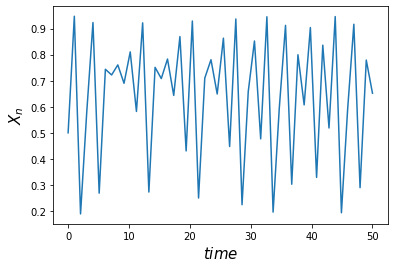

In [9]:
t = np.linspace(0,50, num=50, endpoint=True)
x = 0.5 

plt.plot(t,func(3.79),label='$X_n$')
plt.xlabel('$time$', size=15)
plt.ylabel('$X_n$', size=15)
plt.show()

As you may observe from the graph above, $X_n$ does not follow any sort of pattern at all and you have just observed chaos with a slight change in the value of $r$.

## 3. Logistic Map: Chaos Theory in Biological Systems

Through our qualitative observation of the bifurcation plot, we see that there is chaos. However, how sure are we that the system is chaotic? Is there a more "scientific" way of showing when exactly chaos ensues?

Thankfully, the answer is yes! In chaos theory, the <b>Lyapunov exponent</b> is an mathematical quantity that we can use to understand the chaotic nature of a system. Qualitatively speaking, the Lyapunov exponent measures the rate of separation of 2 infinitesimally close trajectories. Mathematically, for a time discrete system $X_{n+1}=f(X_n)$, the Lyapunov exponent ($λ$) is defined as:

$$λ(x_0) = lim_{n \to \infty} \frac{1}{n} \sum_{i=0}^{n-1} ln|f'(x_i)|$$ 

This might seem a little daunting to understand at first but we can try to understand the above equation by considering the case of a one-variable system with two initial states: $x_0$ and $x_0 + ε$. The 2 states differ by an small amount $ε$. We are interested in the possible values of the variable $x$ after $n$ iterations from the two initial values. The difference $d_n$ between the two values after $n$ iterations is given approximately by $d_n = f(x_n + ε) − f(x_n) = ε^{nλ}$ where $λ$ is the Lyapunov exponent. By observation, we see that if $λ$ is negative, the diffeence between the 2 trajectories is small but if $λ$ is positive, the difference is large. We can calculate $λ$ for all the iterations and this quantity will give us a sense of how "close" the trajectories are.


If we perform some mathematical manipulation to the equation in the previous paragrpah (which we will not cover as it is not the focus of this project), we will eventually end up with the formula for the Lyapunov exponent. Suffice to say, we can obtain the Lyapunov exponent by calculating the time average of $ln|f'(x_i)∣$ at every iteration that occurs over the course of the simulation. 

In the plot below, we plot values of the <b>Lyapunov exponent</b> alongside the previously-seen <b>bifurcation plot</b>. In general, a <b>positive Lyapunov Exponent</b> indicates that the system is chaotic.

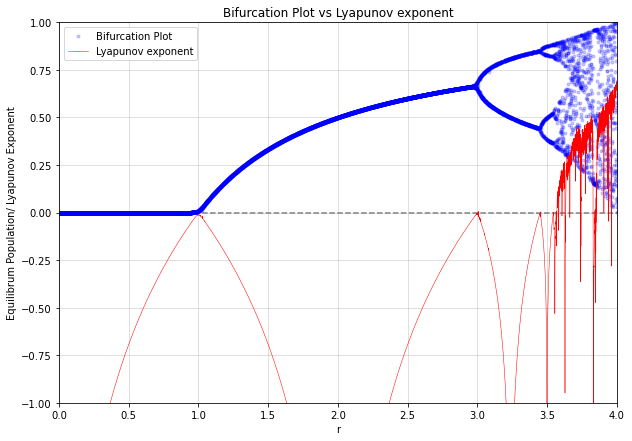

In [10]:
r_list=np.linspace(0,4,10000) 

eq_popn= []  #empty list to store the equilibrium population
lya_exp = [] #empty list to store the lyapunov exponent

for r in r_list: #iterating through all the values of r
    
    """Calculating equilibrum populatonn values"""
    x=np.random.random() 
    for t in range (100): 
        x=r*x*(1-x)
    eq_popn.append(x)
    
    """Calculating Lyapunov Exponent"""
    derivative_nat_log = [] #empty list to store the log of derivative at every time step
    
    for t in range(100):
        x = r * x * (1 - x)
        
        if r-2*r*x == 0:        
            derivative_nat_log.append(-np.inf) #resolving edge case when r-2*r*x is equal to 0 and ln(0) is undefined
        else:
            derivative_nat_log.append(np.log(abs(r-2*r*x))) 
    
    lya_exp.append(np.mean(derivative_nat_log)) 

#create figure    
fig, ax = plt.subplots(figsize=(10, 7)) 
#print(lya_exp)

#plotting
ax.plot(r_list, eq_popn, ls="", marker=".", color="b", alpha = 0.2, label = "Bifurcation Plot")
ax.plot(r_list, lya_exp, color="r", linewidth = 0.5, label = "Lyapunov exponent")
ax.hlines(y=0, xmin=0, xmax=4, ls="dashed", color="grey")

#formatting the plot
ax.set_xlabel("r")
ax.set_ylabel("Equilibrum Population/ Lyapunov Exponent")
ax.set_xlim(0,4)
ax.set_ylim(-1,1)
ax.set_title("Bifurcation Plot vs Lyapunov exponent")
ax.grid('on', alpha=0.5)
ax.legend(loc='best')

plt.show()  

<b>Can we find a stable value of r for 3.5 < r < 4?</b>

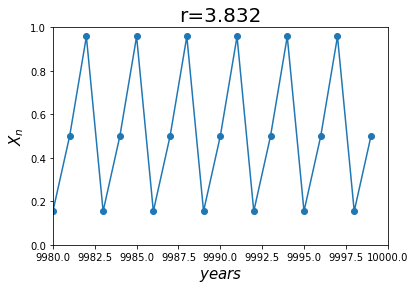

First 20 values are [0.5, 0.958, 0.15418435200000014, 0.49973701207683957, 0.9579997349687338, 0.15418528228915868, 0.4997394776478365, 0.9579997399148945, 0.15418526492759058, 0.4997394316340548, 0.9579997398230132, 0.15418526525010398, 0.49973943248881986, 0.9579997398247204, 0.15418526524411155, 0.499739432472938, 0.9579997398246884, 0.1541852652442238, 0.4997394324732355, 0.9579997398246892]


Last 20 values are [0.4997394324732282, 0.9579997398246891, 0.15418526524422146, 0.4997394324732293, 0.9579997398246892, 0.15418526524422105, 0.4997394324732282, 0.9579997398246891, 0.15418526524422146, 0.4997394324732293, 0.9579997398246892, 0.15418526524422105, 0.4997394324732282, 0.9579997398246891, 0.15418526524422146, 0.4997394324732293, 0.9579997398246892, 0.15418526524422105, 0.4997394324732282]


In [56]:
#plotting
fig, ax = plt.subplots()
def funa(rate, x=0.5):    
    pop = [x]
    for i in range(9999):
        x = rate*x*(1-x)
        pop.append(x)
    return pop

ax.plot(np.arange(0,10000,1),funa(3.832),"o-")
ax.set_xlabel('$years$', size=15)
ax.set_ylabel('$X_n$', size=15)
ax.set_title(f"r=3.832" ,size=20)
ax.set_ylim(0,1)
ax.set_xlim(9980,10000)
plt.show()
print(f'First 20 values are {funa(3.832)[:20]}')
print('\n')
print(f'Last 20 values are {funa(3.832)[9981:10000]}')

As seen from the plot above, the exponent is generally negative as $r$ ranges from 0 to 3.5. This matches up with what we observe in the bifurcation plot!

The exponent then becomes positive when $r$ is between 3.5 and 4.0. Accordingly, this is approximately the same region where we observe chaotic behaviour in the bifurcation plot. The sharp 'dips' of the exponent into the negative teritory  correspond to special values of $r$ that display non-chaotic behaviour.

## 4. Characteristics of a Chaotic System

Before we delve into other (really interesting!) examples of chaos, we first need to understand what the word "chaos" really means. Let us first define some characteristics of a chaotic system. We will be using the above example to illustrate these characteristics:

### (a) Sensitivity to Initial Conditions

A key feature of a determinstic chaotic system is the fact that it is very sensitive to its initial conditions. This means that slight changes to the initial conditions of a system will result in very large differences over time, making its behaviour unpredictable. Let's use an example from above to illustrate this point. How would the population of an organism deviate over 50 years, if the growth rate, $r$ ,  was to increase slightly? Let's take a look: 

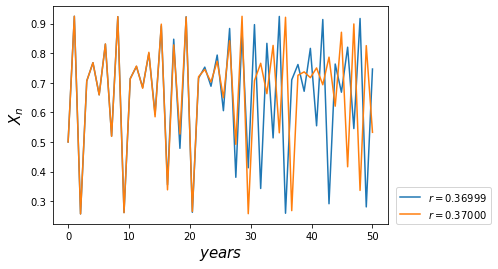

In [9]:
t = np.linspace(0,50, num=50, endpoint=True)  
plt.plot(t,func(3.6999,x=0.5),label='$r = 0.36999$')
plt.plot(t,func(3.7000,x=0.5),label='$r = 0.37000$')
plt.legend(loc=(1.025,0))
plt.xlabel('$years$', size=15)
plt.ylabel('$X_n$', size=15)
plt.show()

As you can see from the graph above, a slight deviation of 0.00001 in the value of the growth rate, $r$, has resulted in huge deviation of $X_n$ after 20 years. This shows that the chaotic system is rather sensitive to its initial conditions. 

### (b) Non-Periodicity

Chaotic systems also tend to exhibit non-periodic behaviour for almost all initial conditions. 

Examples of systems that display periodic behaviour include a regular sinusoidal curve or a simple pendulum. In these systems, values of certain variables repeat themselves at regular intervals. Hence, we term the behaviour of these systems as periodic.

In chaotic systems, for <b>most</b> initial conditions, no such periodicity is observed. For some initial conditions, a chaotic system may still produce certain sequences of values that repeat themselves which constitutes periodic behavior. This only occurs if the system is initialised from that particular point in that sequence. These periodic sequences are "repelling" rather than "attracting" which means that the system will not spontaneously tend from displaying chaos to dislaying regular, periodic behaviour. The reverse, however, can occur.

The plot below compares the logistic maps with 2 different values of $r$: $r= 1+\sqrt8$ and a random value of $r$ between 3.5 and 4. You can run the code multiple times. You should observe that for most values of r, the system is non-periodic. Only at certain values ($1+\sqrt8$ for example) is the behaviour periodic.   

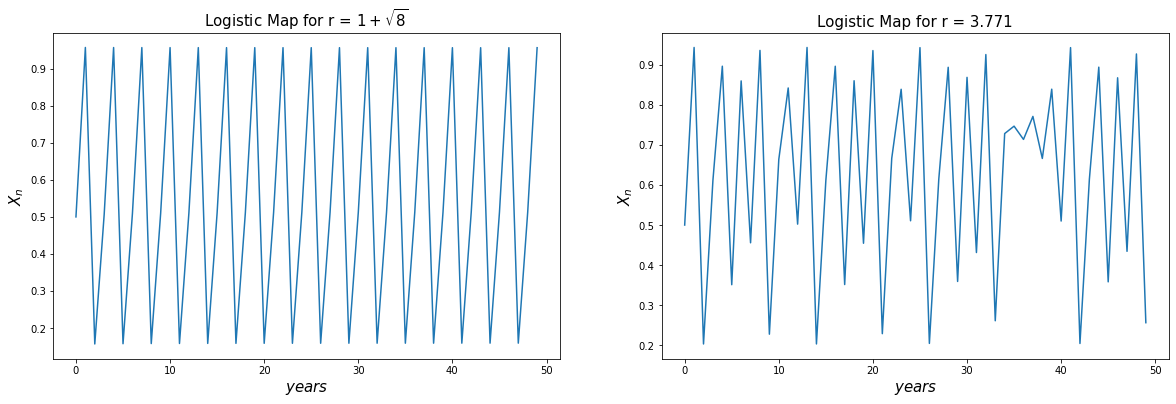

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

#periodic 
axes[0].plot(func(1+np.sqrt(8)))
axes[0].set_xlabel('$years$', size=15)
axes[0].set_ylabel('$X_n$', size=15)
axes[0].set_title('Logistic Map for r = $1+\sqrt{8}$',size=15)

#non-periodic
r = round(np.random.uniform(3.5, 4), 3)
axes[1].plot(func(r))
axes[1].set_xlabel('$years$', size=15)
axes[1].set_ylabel('$X_n$', size=15)
axes[1].set_title(f'Logistic Map for r = {r}',size=15)

plt.show()

### (c) Non-Linearity

In later sections, you will observe that chaotic systems are usually modelled by ordinary differential equations (ODEs). For these systems to display chaotic behaviour, the system must be non-linear as linear ODEs will only display non-chaotic behaviour.

Take for example the differential equation: $\frac{dx}{dt} = 3x + 2$. The terms on the right hand side of the ODE are either linear($3x$) or constant($2$). Hence, it is possible to solve the ODE analytically and the resulting system will not be chaotic.

An example of an ODE that contains non-linear terms will be: $\frac{dx}{dt} = 3x^2$. The term on the right is quadratic and, thus, non-linear. Do note, however, that non-linearity is a necessary condition for chaos but not a sufficient one.

### (d) Deterministic

A chaotic system is also a deterministic system, as compared to a random one. This means that the output result is still dependent on it's initial conditions. A deterministic system can be modelled by an equation and it will always return the same results when given the same input variables. This is in contrast to a random system, whereby the output result may differ even if the input variables remain the same.

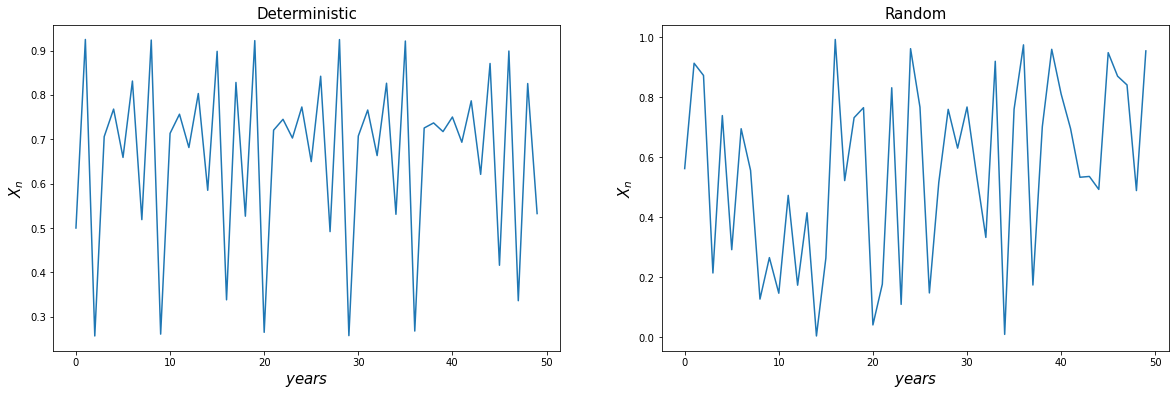

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

#deterministic system
axes[0].plot(func(3.7))
axes[0].set_xlabel('$years$', size=15)
axes[0].set_ylabel('$X_n$', size=15)
axes[0].set_title('Deterministic',size=15)

#random system
y=np.random.rand(50)
axes[1].plot(y)
axes[1].set_xlabel('$years$', size=15)
axes[1].set_ylabel('$X_n$', size=15)
axes[1].set_title('Random',size=15)

plt.show()

Try to run the code above multiple times, you will realise that the graph on the right will always be different due to its random nature, but the graph on the left will always remain the same. 

## 5. Solving Differential Equation: Euler or Runge kutta?

We have previously observed that using the logistic map difference equation, chaos can  be observed by changing a parameter, $r$ , slightly. However, in the real world, chaotic systems are not simply modelled just by difference equations. Usually, chaotic systems are modelled by ordinary differential equations (ODEs), but it is not always possible to solve these ODEs analytically.

Therefore, there is a need for us to explore methods to approximate the solutions of ODEs of different chaotic systems. From a previous lecture, we have learnt that the Euler's method is one of the most common method to approximate solutions to ODEs. Let's recap on the Euler Method:



### Simplest implementation to solving these Differential Equations: The Euler Method

Given a differential equation like so,
\begin{equation}
\dfrac{\text{d}y}{\text{d}x} = f(x,y)
\end{equation}

We can approximate the rate of change of y with respect to x via a fraction:
\begin{equation}
\dfrac{\text{d}y}{\text{d}x} \approx \dfrac{\Delta y}{\Delta x} = f(x,y)
\end{equation}

Manipulating the above equation we obtain
\begin{equation}
\Delta y = f(x,y) \Delta x
\end{equation}

As ${ \text{d}x}$ approaches zero, our equation will become more accurate. Manipulating the above equation, we would get:

$$ y_n =   y_{n-1} + \Delta y$$
$$ y_n =   y_{n-1} + f(x_{n-1},y_{n-1})\Delta x$$

### The Runge-Kutta (RK) method 
Briefly, the RK method is a more accurate algorithm to solve differential equations as compared to the Euler method, which only uses the previous point to approximate the next point. 

We begin with a differential equation.
The rate of change of $y$ with respect to $x$ is the function $f$, which is a function of $x$ and of $y$ itself.

At time $t_0$, the value of y is $y_0$. The function $f$ and initial conditions are given below.

\begin{equation}
\frac{\text{d}y}{\text{d}x} = f(x , y) \\ y(t_0) = y_0 
\end{equation}

Next, we define the value $y_{n+1}$ as 
\begin{equation}
y_{n+1} = y_{n}+ \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4), \space \text{where} \space h>0
\end{equation}

where 
- $k_1 = hf(x_{n-1}, y_{n})$  
- $k_2 = hf(x_{n-1} + \frac{h}{2}, y_{n}+\frac{k_1}{2})$ 
- $k_3 = hf(x_{n-1} + \frac{h}{2}, y_{n}+\frac{k_2}{2})$  
- $k_4 = hf(x_{n-1} + h, y_{n}+ k_3)$ 


$y_{n+1}$ is calculated using the sum of the previous value, $y_n$, with the weighted average of four increments, where each increment is the product of the size of the interval, $h$, and an estimated slope obtained from the function $f$. We divide by 6 as we are taking the average of 1+2+2+1=6 slopes.
In averaging the four slopes, greater weight is given to the slopes at the midpoint.

As $h$ approaches zero, our equation becomes increasingly accurate.


### Demonstrating the Runge-Kutta Method vs the Euler method in solving ODEs

As the modelling of our next 2 chaotic systems involve solving ODEs, we will first have to demonstrate that the Runge Kutta method is a more accurate method to Euler's in solving ODEs. The increased accuracy is important, as we will explain later.

Let's first demonstrate this with the logistic map equation. Now, suppose that the logistic map equation is a differential equation instead: 

$$X_{n+1}=rX_n \space \rightarrow \space \frac{dx}{dt} = rx_t(1-x_t) $$

Using an online integrator, we can determine that the actual (analytical) solution to this problem is:

$$ x_t = \frac{e^y}{1+e^y} ,$$ whereby: $$y = ln(\frac{x_0}{1-x_0})  + rt $$  
(there is no need for you to understand why this is the solution, but this solution is important for us to compare the Euler method with the Runge Kutta method later on!)

- $x_t$ = population of the organism (as a proportion of the theoretical maximum) at time, $t$ 
- $t$ = time in years
- $r$ = growth rate of the organism

### Using the Euler method: ###




In [12]:
def dxdt(x, rate): #Defining the derivative
    return rate * x * (1-x)

def euler(f, x_0, no_of_iterations, ending_t, initial_t=0):
    rate = 3.5 #suppose the rate is 3.5
    step_size = (ending_t - initial_t)/no_of_iterations #step_size = delta x in the Euler's method shown above 
    
    x_list = [x_0]*no_of_iterations #creating a list of values. The number of values in this list = number of iterations
    time = np.linspace(initial_t, ending_t, num=no_of_iterations) #creating an array for time
    
    for i in range(1,len(time)): # starting the Euler loop
        x_list[i] = x_list[i-1] + f(x_list[i-1], rate)*step_size # Applying the Euler method
    
    return time, np.array(x_list)

### Using the Runge Kutta method: ###

In [13]:
def rungekutta(f, x_0, no_of_iterations, ending_t, initial_t=0):
    
    rate = 3.5
    step_size = (ending_t - initial_t)/no_of_iterations #h=stepsize 
    
    x_list = [x_0]*no_of_iterations
    time = np.linspace(initial_t, ending_t, num=no_of_iterations)
    
    # Applying the runge kutta method, you do not need to know how the runge kutta method works #
    
    for i in range(1, no_of_iterations):
        k1 = step_size * f(x_list[i-1], rate)
        k2 = step_size * f(x_list[i-1] + 0.5 * k1, rate)
        k3 = step_size * f(x_list[i-1] + 0.5 * k2, rate)
        k4 = step_size * f(x_list[i-1] + k3, rate)
        
        x_list[i] = x_list[i-1] + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        
    return time, np.array(x_list)

### Comparing both methods with the actual solution: ###

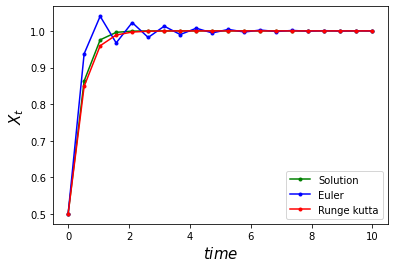

Summation of differences between the method and actual solution
Actual - Euler:    0.26034
Actual - Runge-Kutta:    0.04156


In [14]:
##Actual solution, you can refer to the formula shown above##

time = np.linspace(0,10,20)
y=np.log(0.5/(1-0.5)) + 3.5*time #remember that rate is 3.5
e=(np.e**y)/(1+(np.e**y))

z1 = euler(dxdt, 0.5, 20, 10)
z2 = rungekutta(dxdt, 0.5, 20, 10)

plt.plot(time,e,ls="-",marker = '.',color ="g",label='Solution') 
plt.plot(z1[0], z1[1], ls="-", marker = '.', color='b',label='Euler') 
plt.plot(z2[0], z2[1], ls="-", marker = '.', color='r',label='Runge kutta') 
plt.legend(loc='lower right')
plt.xlabel('$time$', size=15)
plt.ylabel('$X_t$', size=15)
plt.show()

print('Summation of differences between the method and actual solution')
print(f"Actual - Euler: {round(abs(e-z1[1]).sum(),5):>10}") 
print(f"Actual - Runge-Kutta: {round(abs(e-z2[1]).sum(),5):>10}")

As seen from the graphs above, we can conclude that Runge kutta is a much better method than Euler in approximating solutions to derivatives. From now on, we shall use the Runge kutta method for our next 2 examples to demonstrate chaos, starting with the Lorenz Attractor!

## 6. Lorenz Attractor

The Lorenz attractor is a strange attractor living in 3D space that relates three parameters arising in fluid dynamics. It is one of the Chaos theory's most iconic images and illustrates the phenomenon now known as the Butterfly effect or (more technically) sensitive dependence on initial conditions. 

According to Lorenz, there are **three quantities** that characterize the state of the fluid:

$x$ : the rate of convective motion - i.e. how fast the rolls are rotating,

$y$ : the temperature difference between the ascending and descending currents, and

$z$ : the distortion (from linearity) of the vertical temperature profile.

Lorenz showed that the quantities 
$x$, $y$, and $z$ are related via a set of differential equations:

$$ \frac{dx}{dt} ={\sigma }(y - x) ,$$ 

$$ \frac{dy}{dt} = x(\rho - z) - y $$

$$ \frac{dz}{dt} = xy - \beta z $$

## Changing the initial conditions of the Lorenz Attractor
Note that $\sigma$, $\rho$, and $\beta$ are parameters; they depend on conditions like the fluid, the heat input, the size of the pot, etc, but they are assumed constant and are the initial conditions throughout one experiment. 

Since chaotic systems are **sensitive to initial conditions**, a small change in the initial conditions can cause the Lorenz Attractor system to produce a different output. Let us demonstrate this sensitivity to initial conditions by using 2 different values of the $\beta$ parameters. 

The two values used will be **$\beta$ = 1.2** and **$\beta$ = 1.0**

In the graphs of the subsequent Lorenz Attractor code, we will see how a small change in the values of the $\beta$ parameter, will result in a large change in the graph:

<Figure size 432x288 with 0 Axes>

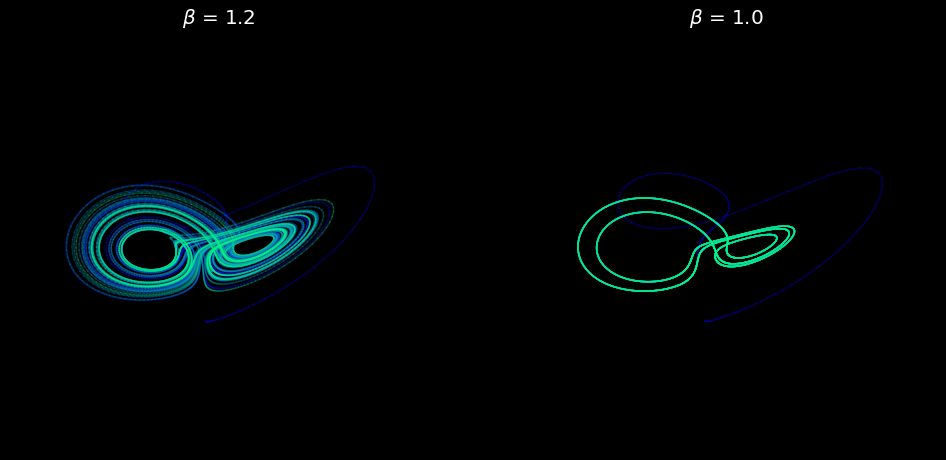

In [42]:
##########################################################################
# RUNGE-KUTTA METHOD
##########################################################################
def RK_function(dt, f, x,y,z):
    k1 = dt * f(x, y, z)
    k2 = dt * f(x + 0.5 * k1, y + 0.5 * k1, z + 0.5 * k1)
    k3 = dt * f(x + 0.5 * k2, y + 0.5 * k2, z + 0.5 * k1)
    k4 = dt * f(x + k3, y + k3, z + k3)
    return 1/6 * (k1 + 2*k2 + 2*k3 + k4)

def rungekutta(initial_variables, no_of_iterations, final_t, start_t=0):
    
    def dxdt(x, y, z):
        return sigma*(y-x)
    def dydt(x, y, z):
        return x*(rho-z)-y
    def dzdt(x, y, z):
        return x*y-beta*z
    
    delta_t = (final_t - start_t)/no_of_iterations
    time = [start_t]
     
    x_values = [initial_variables[0]]
    y_values = [initial_variables[1]]
    z_values = [initial_variables[2]]
    sigma = initial_variables[3]
    rho = initial_variables[4]
    beta = initial_variables[5]

    for i in range(no_of_iterations):             
        time.append(time[i] + delta_t)
        
        # Now we append the values to each list
        x_values.append(x_values[i] + RK_function(delta_t, dxdt, x_values[i],y_values[i],z_values[i]))
        y_values.append(y_values[i] + RK_function(delta_t, dydt, x_values[i],y_values[i],z_values[i]))
        z_values.append(z_values[i] + RK_function(delta_t, dzdt, x_values[i],y_values[i],z_values[i]))
        
    return time, x_values, y_values, z_values

no_of_iterations = 15000
final_t = 150
result_rk1 = rungekutta((0, 1, 1.05, 9, 27, 1.2), no_of_iterations, final_t)
result_rk2 = rungekutta((0, 1, 1.05, 9, 27, 1.0), no_of_iterations, final_t)

# plot plot plot plot plot plot
plt.clf()
fig = plt.figure(facecolor='k', figsize=(10,10))

#First plot
ax = fig.add_subplot(131, projection='3d')
ax.set_facecolor('k')
ax.set_title(r"$\beta$ = 1.2", color = 'white', fontsize = 20)


s = 1
cmap = plt.cm.winter
for i in range(0,no_of_iterations-s,s):
    ax.plot(result_rk1[1][i:i+s+1], result_rk1[2][i:i+s+1], result_rk1[3][i:i+s+1], color=cmap(i/no_of_iterations), alpha=0.3)
ax.set_axis_off()

#Second plot
ax = fig.add_subplot(132, projection='3d')
ax.set_facecolor('k')
ax.set_title(r"$\beta$ = 1.0 ", color = 'white', fontsize = 20)
fig.subplots_adjust(left=0, right=2, bottom=0, top=2)

for i in range(0,no_of_iterations-s,s):
    ax.plot(result_rk2[1][i:i+s+1], result_rk2[2][i:i+s+1], result_rk2[3][i:i+s+1], color=cmap(i/no_of_iterations), alpha=0.3)
"""
#Third plot
ax = fig.add_subplot(133, projection='3d')
ax.set_facecolor('k')
ax.set_title(r"$\beta$ = 1.0 ", color = 'white', fontsize = 20)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

for i in range(0,no_of_iterations-s,s):
    ax.plot(result_rk2[1][i:i+s+1], result_rk2[2][i:i+s+1], result_rk2[3][i:i+s+1], color=cmap(i/no_of_iterations), alpha=0.3)    
"""
ax.set_axis_off()
plt.show()

<div class="alert alert-warning">
Looking at the above graphs, $\beta$ = 1.2 was used to plot the graph on the left while $\beta$ = 1 was used to plot the graph on the right. 
</div>

The small change in value of one of the parameters ($\beta$) resulted in a drastic difference in the output of the model of the Lorenz Attractor! For this reason, the Runge-Kutta method is preferred over the Euler Method as small rounding errors can massively change the expected result. By using a more accurate method to solving the ODEs, we can ensure that any changes observed are a result of changes in initial conditions, thereby highlighting the characteristic sensitivity of a chaotic system.

## 7. Double Pendulum  
Let's move on to our last example of a chaotic system in the field of physics! Let's first define the relevant variables and equations:

### Relevant variables and equations

($x_1,\space y_1$) as the position of Bob 1

($x_2,\space y_2$) as the position of Bob 2

$l_1, l_2$ is the length of Rod 1 and Rod 2 

$\theta_1,\space \theta_2$ are the angles between the Rod and the vertical for Rod 1 and Rod 2 respectively

$ p_1,\space p_2$ are the angular velocities of Bob 1 and Bob 2 respectively, hence $\dot{p}$ is the angular acceleration

$m_1,\space m_2$ are the masses of Bob 1 and Bob 2 respectively

$g$ = gravitational constant of $9.81ms^{-2}$

<img src="https://www.researchgate.net/profile/Iman-Izadgoshasb/publication/331024972/figure/fig1/AS:725254309699586@1549925510035/Double-pendulum-system.png" width="250" height="250">

Image taken from https://www.researchgate.net/figure/Double-pendulum-system_fig1_331024972

### Program in the four first-order Ordinary Differential Equations for a double pendulum*,

\begin{equation}
\dot{\theta}_1 = p_1 
\end{equation}

\begin{equation}
\dot{\theta}_2 = p_2 
\end{equation}

\begin{equation}
\dot{p}_1 = \dfrac{−g(2m_1 + m_2)sin (\theta_1) − g m_2  sin(\theta_1 − 2 \theta_2) − 2 m_2 sin(\theta_1 − \theta_2) (p_2^2 + p_1^2cos(\theta_1 − \theta_2))}{(2m_1 + m_2 − m_2cos(2\theta_1 − 2\theta_2))} 
\end{equation}

\begin{equation}
\dot{p}_2 = \dfrac{2 sin(\theta_1−\theta_2) (p_1^2 (m_1 + m_2) + g(m_1 + m_2) cos \theta_1 + p_2^2 m_2 cos(\theta_1 − \theta_2))}{(2m_1 + m_2 − m_2 cos(2 \theta_1 − 2 \theta_2))}
\end{equation}

_*The equations are slightly simplified as we fixed $l_1$ = $l_2$ = $1m$_

### Plotting the pendulum's path using matplotlib
After running the code below, we will observe a colour map that shows the path of the second bob from start to end. We used a colour map to show the passage of time. In particular, the colours transition from dark purple to dark red, like a reversed rainbow.

In [14]:
################################################################
# Set and explain initial conditions
################################################################
m1 = m2 = 1                       # mass of the 1st and the 2nd pendulum   
g = 9.81                          # gravity
l = 1                             # length of the 1st and the 2nd pendulum   
t = 0                             # starting time
a1_arr = np.array([np.pi/2, 0])   # a1_arr is an array that contains the initial angle, theta = np.pi and 
                                  # initial angular velocity, p1 = 0 of the first bob
a2_arr = np.array([np.pi/2, 1])   # a2_arr is an array that contains the initial angle, theta = np.pi and 
                                  # initial angular velocity, p2 = 1 of the second bob

################################################################
# Functions to define
################################################################
def angular_acc1(a1_arr,a2_arr): # Formula for p1_dot, the angular acceleration 
    # This function calculates the angular acceleration for the 1st pendulum
    # Inputs-> a1_arr: np.array([Initial angle, Initial angular velocity]);
    #          a2_arr: np.array([Initial angle, Initial angular velocity]);
    
    num = -g *(2+m2)*np.sin(a1_arr[0]) - m2*g*np.sin(a1_arr[0]-2*a2_arr[0])- 2* m2*np.sin(a1_arr[0]-a2_arr[0]) * (1 + pow(a2_arr[1],2)+pow(a1_arr[1],2)*np.cos(a1_arr[0]-a2_arr[0]))
    den = (2+m2-m2 * np.cos(2*a1_arr[0]-2*a2_arr[0]))
    return num/den

def angular_acc2(a1_arr,a2_arr):
    # This function calculates the angular acceleration for the 2nd pendulum
    # Inputs-> a1_arr: np.array([Initial angle, Initial angular velocity])
    #          a2_arr: np.array([Initial angle, Initial angular velocity])
    
    temp = (2*np.sin(a1_arr[0]-a2_arr[0])) 
    num = temp * (pow(a1_arr[1],2)*(m1+m2)+g*(m1+m2)*np.cos(a1_arr[0])+pow(a2_arr[1],2)*m2*np.cos(a1_arr[0]-a2_arr[0]))
    den = (2 + m2 - np.cos(2*a1_arr[0]-2*a2_arr[0]))
    return num/den

def deriv_a1(a1_arr,a2_arr,t):
    # This function returns an array containing p1 and derivative of p1
    # Inputs-> a1_arr: np.array([Initial angle, Initial angular velocity])
    #          a2_arr: np.array([Initial angle, Initial angular velocity])
    #          t: time value
    return np.array([a1_arr[1],angular_acc1(a1_arr,a2_arr)])

def deriv_a2(a2_arr,a1_arr,t):
    # This function returns an array containing p2 and derivative of p2
    # Inputs-> a1_arr: np.array([Initial angle, Initial angular velocity])
    #          a2_arr: np.array([Initial angle, Initial angular velocity])
    #          t: time value
    return np.array([a2_arr[1],angular_acc2(a1_arr,a2_arr)])

################################################################
# RungeKutta function to define
################################################################

def rk4(deriv,func_i,func_i2, t_0, step_size):
    
    # This function executes the RungeKutta method
    # Inputs-> deriv: one of the above 2 functions that calculates p and its derivative, depends on if we want to find p1 or p2
    #          func_i: the values to be calculated ()
    #          func_i2: these are values of the other bob passed as an argument for func_i (see above deriv_a1 and deriv_a2),
    #                   we need values of bob1 to get values of bob 2 and vice versa
    #          t_0: the initial time
    #          step_size: the step size or time increment         
    
    # Runge kutta takes some estimates given some variable here
    k1 = step_size * deriv(func_i, func_i2, t)
    k2 = step_size * deriv(func_i + step_size/2, func_i2, step_size * k1/2)
    k3 = step_size * deriv(func_i + step_size/2, func_i2, step_size * k2/2)
    k4 = step_size * deriv(func_i + step_size, func_i2, step_size * k3)
    # Runge kutta takes the weighted average of the above estimates here
    func = func_i + 1/6 * (k1 +2*k2 + 2*k3 + k4)
    # Increase the time value by step_size
    t_values = t_0 + step_size
    return (t_values, func)

In [ ]:
################################################################
# Solve our ODEs with the specified conditions
################################################################

step_size = 0.001                   # step size for the RK method -> smaller step_size, more accurate estimates
steps_no = 12000                    # number of steps of the RK method -> more steps, more values are calculated, longer trail

time_arr = np.array([t])
func_array1 = np.array([a1_arr])
func_array2 = np.array([a2_arr])

# Run the RK function and obtain data values here
for i in range(steps_no):
    temp = a1_arr
    (t,a1_arr) = rk4(deriv_a1, a1_arr, a2_arr, t, step_size) 
    (t,a2_arr) = rk4(deriv_a2, a2_arr, temp, t, step_size)
    func_array1 = np.vstack((func_array1,np.array([a1_arr]))) # Vertically stacking each value over the previous;
    func_array2 = np.vstack((func_array2,np.array([a2_arr]))) # each value is its own row essentially
    t += step_size
print(func_array1)

In [ ]:
################################################################
# Creating our plot
################################################################
 
# We can plot the pendulum's position or angular speed/acceleration as a function of time
# but we must first flatten our vertically stacked array, and assign both the theta angle
# and the angular velocity as separate variables, hence the use of matrix transposition

[pendulum1_theta, pendulum1_angular_speed] = func_array1.transpose()
[pendulum2_theta, pendulum2_angular_speed] = func_array2.transpose()

# this part uses the angles to get coordinates (kind of like changing from polar coords to cartesian coords)
# also, pendulum 1 hangs from origin (0,0)
pendulum1_x = np.sin(pendulum1_theta)
pendulum1_y = - np.cos(pendulum1_theta)

pendulum2_x = np.sin(pendulum2_theta) + pendulum1_x
pendulum2_y = pendulum1_y - np.cos(pendulum2_theta)

# set up the figure
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_ylim(-2.5, 2.5)
ax.set_xlim(-2.5, 2.5)
ax.set_title('Double Pendulum Path', fontsize=16)
ax.grid()

# Multicoloured plot (colour map)
s = 5                     # how frequently the colour changes in our plot -> smaller s, more gradual colour change
cmap = plt.cm.jet         # We chose 'jet' for the gradual colour change that can be obsered; 'hsv' also works (rainbow)
for i in range(0, steps_no-s, s):
    ax.plot(pendulum2_x[i:i+s+1], pendulum2_y[i:i+s+1], color=cmap(i/steps_no), alpha=0.1, marker = '.')
    # Sidenote: Because we are 'joining' several graphs of different colours together, we cannot label the plot otherwise
    # there would be (steps_no-s)/s total plots to label and the legend list would be too long

plt.show()

### Changing the initial conditions of the Double Pendulum


Since chaotic systems are **non-linear**, even small rounding errors can cause a system to take a drastically different path, leading to a drastically different output. For a double pendulum, we can demonstrate this sensitivity to initial conditions by increasing the mass of our bobs. This allows us to observe how small changes in the 'input' causes a largely disproportional change in the 'output'.

The mass of the bobs will be increased from 1.000 to **1.001**

After running the code below, we will observe two plots that show the path of the second bob from start to end under the different intial mass conditions. The same colour map from above is used. 


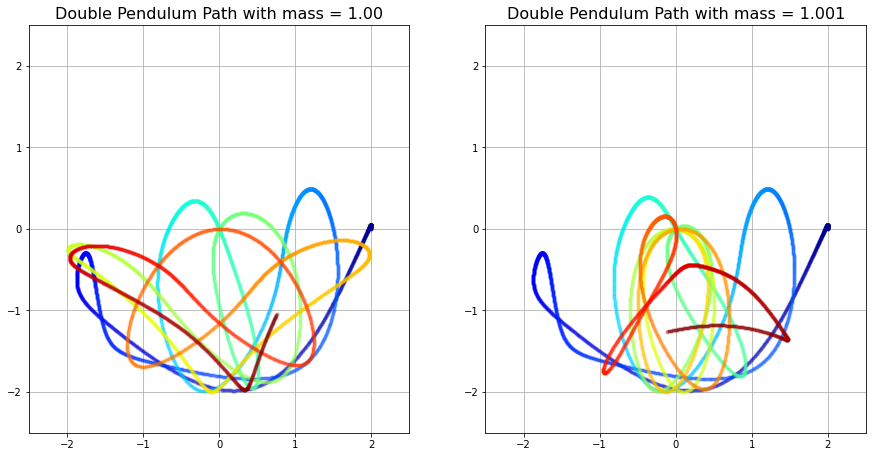

In [7]:
################################################################
# Constants in initial conditions
################################################################
g = 9.81                          # gravity
l = 1                             # length of the 1st and the 2nd pendulum   

################################################################
# Solve our ODEs with the specified conditions
################################################################

# Use the same step_size and steps_no
step_size = 0.001                         # step size for the RK method -> smaller step_size, more accurate estimates
steps_no = 12000                          # number of steps of RK method -> more steps, more values calculated, longer trail

######### Initial arrays for ORIGINAL mass ######### 
a1_arr = np.array([np.pi/2, 0])           # a1_arr is an array that contains the initial angle, theta = np.pi and 
                                          # initial angular velocity, p1 = 0 of the first bob
a2_arr = np.array([np.pi/2, 1])           # a2_arr is an array that contains the initial angle, theta = np.pi and 
                                          # initial angular velocity, p2 = 1 of the second bob
time_arr = np.array([t])
func_array1 = np.array([a1_arr])
func_array2 = np.array([a2_arr])

######### Initial arrays for ALTERED mass ######### 
a1_arr_new = np.array([np.pi/2, 0])       
a2_arr_new = np.array([np.pi/2, 1])   
time_arr_new = np.array([t])
func_array1_new = np.array([a1_arr_new])
func_array2_new = np.array([a2_arr_new])


# Run the RK function and obtain data values here for original and altered values of mass
for iteration in range(2):
    if iteration == 0:
        ######### Initial mass for ORIGINAL mass #########
        t = 0
        m1 = m2 = 1                       
         
        for i in range(steps_no):
            temp = a1_arr
            (t,a1_arr) = rk4(deriv_a1, a1_arr, a2_arr, t, step_size) 
            (t,a2_arr) = rk4(deriv_a2, a2_arr, temp, t, step_size)
            time_arr2 = np.append(time_arr, t)
            func_array1 = np.vstack((func_array1,np.array([a1_arr]))) # Vertically stacking each value over the previous,
            func_array2 = np.vstack((func_array2,np.array([a2_arr]))) # each value is its own row essentially
            t += step_size
        
    else:
        ######### Initial mass for ALTERED mass #########
        t = 0
        m1 = m2 = 1.001                                               # ALTERED mass of the 1st and the 2nd pendulum
        
        for i in range(steps_no):
            temp_new = a1_arr_new
            (t, a1_arr_new) = rk4(deriv_a1, a1_arr_new, a2_arr_new, t, step_size) 
            (t, a2_arr_new) = rk4(deriv_a2, a2_arr_new, temp_new, t, step_size)
            time_arr2_new = np.append(time_arr_new, t)
            func_array1_new = np.vstack((func_array1_new, np.array([a1_arr_new]))) 
            func_array2_new = np.vstack((func_array2_new, np.array([a2_arr_new])))
            t += step_size

In [ ]:
################################################################
# Creating our plot
################################################################
 
# We can plot the pendulum's position or angular speed/acceleration as a function of time
# but we must first flatten our vertically stacked array, and assign both the theta angle
# and the angular velocity as separate variables, hence the use of matrix transposition

[pendulum1_theta, pendulum1_angular_speed] = func_array1.transpose()
[pendulum2_theta, pendulum2_angular_speed] = func_array2.transpose()

[pendulum1_theta_new, pendulum1_angular_speed_new] = func_array1_new.transpose()
[pendulum2_theta_new, pendulum2_angular_speed_new] = func_array2_new.transpose()

# this part uses the angles to get coordinates (kind of like changing from polar coords to cartesian coords)
# also, pendulum 1 hangs from origin (0,0)
pendulum1_x = np.sin(pendulum1_theta)
pendulum1_y = - np.cos(pendulum1_theta)
pendulum2_x = np.sin(pendulum2_theta) + pendulum1_x
pendulum2_y = pendulum1_y - np.cos(pendulum2_theta)

pendulum1_x_new = np.sin(pendulum1_theta_new)
pendulum1_y_new = - np.cos(pendulum1_theta_new)
pendulum2_x_new = np.sin(pendulum2_theta_new) + pendulum1_x_new
pendulum2_y_new = pendulum1_y_new - np.cos(pendulum2_theta_new)

# set up the figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7.5))
ax[0].set_ylim(-2.5, 2.5)
ax[0].set_xlim(-2.5, 2.5)
ax[0].set_title('Double Pendulum Path with mass = 1.000', fontsize=16)
ax[0].grid()

ax[1].sharex(ax[0])
ax[1].sharey(ax[0])
ax[1].set_title('Double Pendulum Path with mass = 1.001', fontsize=16)
ax[1].grid()

# Multicoloured plot (colour map)
s = 5                     # how frequently the colour changes in our plot -> smaller s, more gradual colour change
cmap = plt.cm.jet         # We chose 'jet' for the colour change that can be obsered; 'hsv' also works (rainbow)
for i in range(0, steps_no-s, s):
    ax[0].plot(pendulum2_x[i:i+s+1], pendulum2_y[i:i+s+1], color=cmap(i/steps_no), alpha=0.1, marker = '.')
for i in range(0, steps_no-s, s):
    ax[1].plot(pendulum2_x_new[i:i+s+1], pendulum2_y_new[i:i+s+1], color=cmap(i/steps_no), alpha=0.1, marker = '.')

# If we desire a uni-colour scatterplot of the pendulum's poth, we can uncomment the below code instead
# ax.scatter(pendulum2_x, pendulum2_y,s=5, color='black',alpha=0.25)
plt.show()


<div class="alert alert-warning">
  In particular, pay attention to how the $ \color{purple}{\text{dark purple}} $ segments (when $steps\_no$ is low and pendulum has just began swinging) in both graphs follow a similar path, but eventually diverge and have drastically different end points (represented by $ \color{darkred}{\text{dark red}} $ segments) Once again we can see how a chaotic system is very sensitive to its initial conditions!
</div>

## 8. Conclusion

And, with that, we come to the end of this short primer. We hope that this short primer will inspire you to look out for potential examples of chaotic systems in whatever field or discipline that you are interested in. Just keep in mind the few key features of deterministic chaotic systems that distinguish it from non-chaotic ones: its sensitivity to initial conditions, non-linearity and non-periodicity!

There are many, many other examples of chaotic systems that we did not touch on such as the 3-body problem, the Rossler Attractor amongst many others. In fact, even our solar system may have some chaos involved in it too! Feel free to explore these other systems and model them yourselves (if you can!).

References:
Author: Ahmed Alkharusi
Double Pendulum Simulation (RK4) in Python 
https://github.com/Ahmed-alkharusi/Interesting-problems-/blob/master/double%20pendulum%20simulation%20(RK4)/Python%20version/Source.py

Also, equations referenced from here: https://www.myphysicslab.com/pendulum/double-pendulum-en.html